In [1]:
import numpy as np 
import pandas as pd 
import os
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator, load_img, img_to_array
from tensorflow.keras.models import Sequential, Model
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Dense, GlobalAveragePooling2D, Dropout, Flatten
from tensorflow.keras.applications import VGG16
import matplotlib.pyplot as plt
import seaborn as sns

/opt/conda/lib/python3.10/site-packages/scipy/__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.23.5
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


In [2]:
train_ds="/kaggle/input/100-bird-species/train"
test_ds="/kaggle/input/100-bird-species/test"
validation_ds="/kaggle/input/100-bird-species/valid"

# Data preprocessing
****

In [3]:
os.listdir('/kaggle/input/100-bird-species/train')

['DALMATIAN PELICAN',
 'BLACK BREASTED PUFFBIRD',
 'WATTLED CURASSOW',
 'AMERICAN WIGEON',
 'CARMINE BEE-EATER',
 'GAMBELS QUAIL',
 'UMBRELLA BIRD',
 'AMERICAN KESTREL',
 'AMERICAN GOLDFINCH',
 'BLUE GROSBEAK',
 'PALM NUT VULTURE',
 'DUSKY LORY',
 'AUCKLAND SHAQ',
 'BLACK THROATED WARBLER',
 'YELLOW CACIQUE',
 'STRIPPED SWALLOW',
 'VERMILION FLYCATHER',
 'CAPE MAY WARBLER',
 'RED TAILED HAWK',
 'GURNEYS PITTA',
 'INDIAN ROLLER',
 'SNOW GOOSE',
 'GREEN WINGED DOVE',
 'AZURE TANAGER',
 'GREEN MAGPIE',
 'BANDED BROADBILL',
 'AFRICAN PYGMY GOOSE',
 'INDIGO FLYCATCHER',
 'GREY PLOVER',
 'TOUCHAN',
 'HYACINTH MACAW',
 'HARLEQUIN DUCK',
 'ABYSSINIAN GROUND HORNBILL',
 'CALIFORNIA QUAIL',
 'BALD IBIS',
 'WOOD THRUSH',
 'RUBY THROATED HUMMINGBIRD',
 'INDIGO BUNTING',
 'ALBERTS TOWHEE',
 'SORA',
 'HOODED MERGANSER',
 'ROSEATE SPOONBILL',
 'CAPE ROCK THRUSH',
 'BLUE COAU',
 'CALIFORNIA CONDOR',
 'BORNEAN PHEASANT',
 'BARN SWALLOW',
 'TAIWAN MAGPIE',
 'SPLENDID WREN',
 'RED BILLED TROPICBIRD',
 'B

In [4]:
batch_size=32
img_size=224

In [5]:
train_datagen = ImageDataGenerator(rescale=1/255.,
                             zoom_range=0.2,
                            width_shift_range=0.2,height_shift_range=0.2
                             )

val_datagen = ImageDataGenerator(rescale=1/255.)

test_datagen = ImageDataGenerator(rescale=1/255.)

train_generator = train_datagen.flow_from_directory(train_ds,  
                                                target_size=(img_size, img_size), 
                                                batch_size=batch_size,
                                                shuffle=True,
                                                class_mode='categorical')  

validation_generator = val_datagen.flow_from_directory(validation_ds,
                                                    target_size=(img_size, img_size),
                                                    batch_size=batch_size,
                                                    shuffle=False,
                                                    class_mode='categorical')

test_generator = test_datagen.flow_from_directory(test_ds,
                                                    target_size=(img_size, img_size),
                                                    batch_size=batch_size,
                                                    shuffle=False,
                                                    class_mode='categorical')

Found 84635 images belonging to 525 classes.
Found 2625 images belonging to 525 classes.
Found 2625 images belonging to 525 classes.


In [6]:
train_generator[0][0].shape

(32, 224, 224, 3)

In [7]:
img= train_generator[0]
print(img)

(array([[[[0.43348414, 0.5406402 , 0.17275009],
         [0.373523  , 0.48530057, 0.08921184],
         [0.3931547 , 0.47058827, 0.11607699],
         ...,
         [0.18823531, 0.1764706 , 0.10980393],
         [0.18823531, 0.1764706 , 0.10980393],
         [0.18823531, 0.1764706 , 0.10980393]],

        [[0.43348414, 0.5406402 , 0.17275009],
         [0.373523  , 0.48530057, 0.08921184],
         [0.3931547 , 0.47058827, 0.11607699],
         ...,
         [0.18823531, 0.1764706 , 0.10980393],
         [0.18823531, 0.1764706 , 0.10980393],
         [0.18823531, 0.1764706 , 0.10980393]],

        [[0.43348414, 0.5406402 , 0.17275009],
         [0.373523  , 0.48530057, 0.08921184],
         [0.3931547 , 0.47058827, 0.11607699],
         ...,
         [0.18823531, 0.1764706 , 0.10980393],
         [0.18823531, 0.1764706 , 0.10980393],
         [0.18823531, 0.1764706 , 0.10980393]],

        ...,

        [[0.09614412, 0.10006569, 0.0768547 ],
         [0.10291461, 0.10662661, 0.09152954

In [8]:
type(train_generator)

keras.preprocessing.image.DirectoryIterator

In [9]:
img = train_generator[0]
print(img[0].shape) # shape of the input batch
print(img[1].shape) # shape of the target labels

(32, 224, 224, 3)
(32, 525)


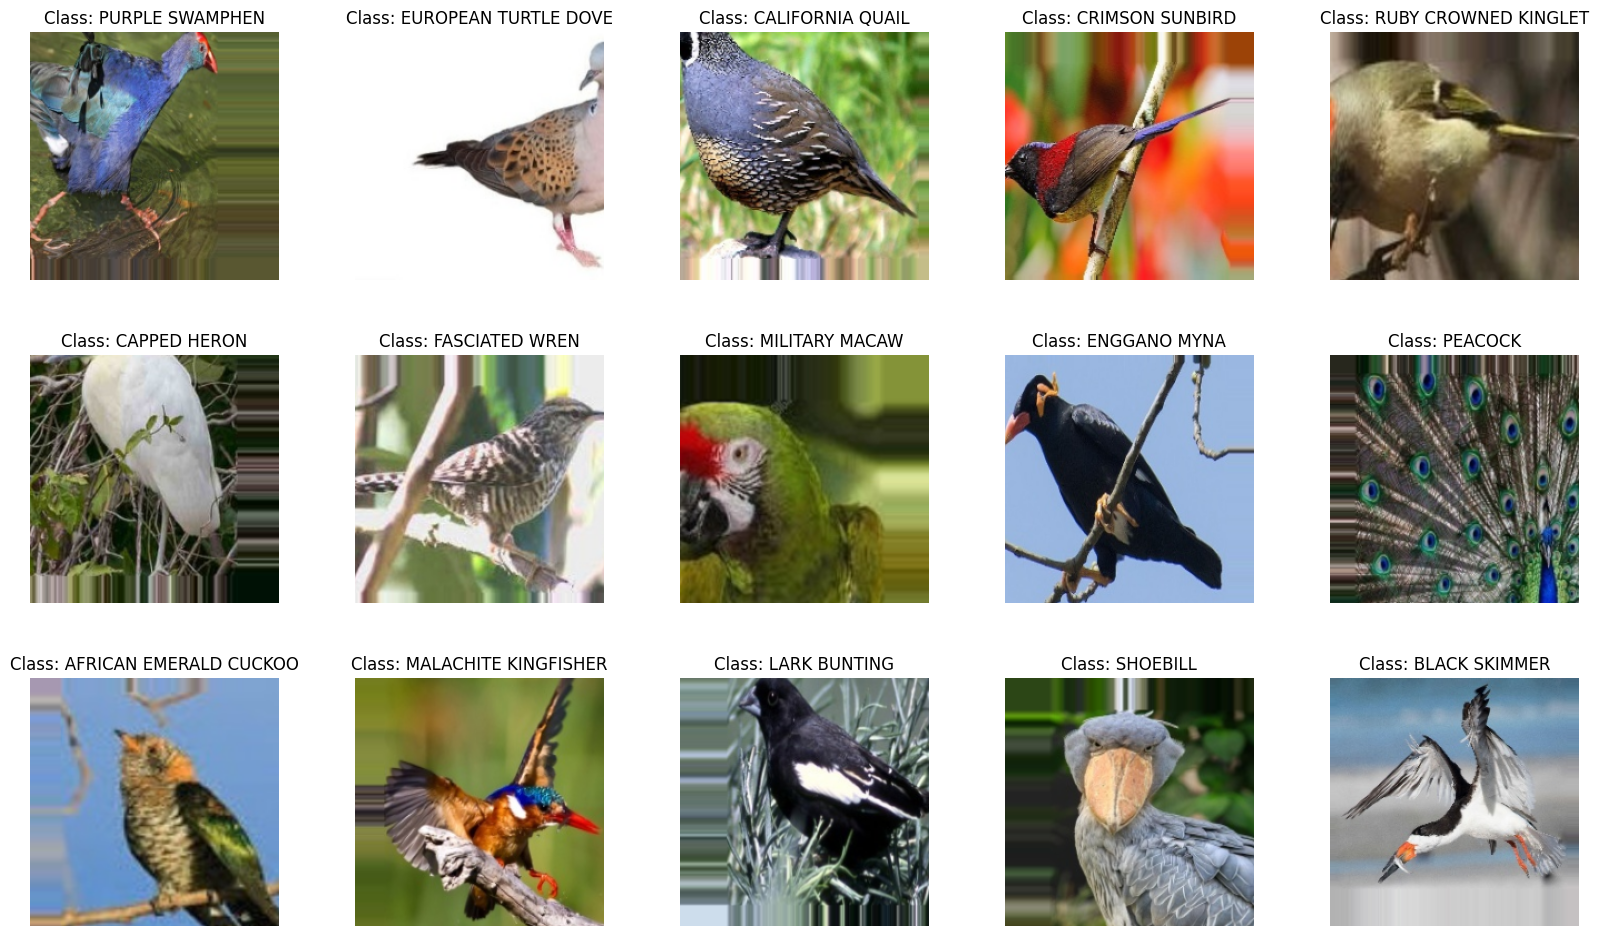

In [10]:
labels = [k for k in train_generator.class_indices]
sample_generate = train_generator.__next__()

images = sample_generate[0]
titles = sample_generate[1]
plt.figure(figsize = (20 , 20))

for i in range(15):
    plt.subplot(5 , 5, i+1)
    plt.subplots_adjust(hspace = 0.3 , wspace = 0.3)
    plt.imshow(images[i])
    plt.title(f'Class: {labels[np.argmax(titles[i],axis=0)]}')
    plt.axis("off")

In [11]:
print(len(train_generator))
print(len(test_ds))
print(len(validation_ds))

2645
35
36


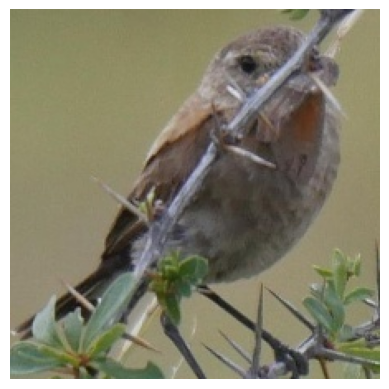

In [12]:
import matplotlib.pyplot as plt
from skimage import io

# Load image
img_url = "/kaggle/input/100-bird-species/train/AUSTRAL CANASTERO/030.jpg"
img = io.imread(img_url)

# Display image
plt.imshow(img)
plt.axis('off')
plt.show()

In [13]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Flatten, Softmax
from tensorflow.keras.preprocessing import image
import matplotlib.pyplot as plt
import pandas as pd

# Build Sequential Model

In [14]:
seq_model = Sequential([ 
    Flatten(input_shape=(224,224,3), name='input_layer'),
      Dense(128, activation='relu', name='layer1'),
    Dense(64, activation='relu', name='layer2'),
    # Dense(64, activation='relu', name='layer2'),
    Dense(32, activation='relu', name='layer3'),
    # Dense(32, activation='relu', name='layer4'),
    Dense(525, activation='softmax', name='output_layer')
])

#   Model summary

In [15]:
# Print the model summary

seq_model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_layer (Flatten)       (None, 150528)            0         
                                                                 
 layer1 (Dense)              (None, 128)               19267712  
                                                                 
 layer2 (Dense)              (None, 64)                8256      
                                                                 
 layer3 (Dense)              (None, 32)                2080      
                                                                 
 output_layer (Dense)        (None, 525)               17325     
                                                                 
Total params: 19,295,373
Trainable params: 19,295,373
Non-trainable params: 0
_________________________________________________________________


In [16]:
import keras
from keras.models import Sequential
from keras.layers import Dense

In [17]:
from keras.optimizers import Adam
opt = Adam(learning_rate=0.00001)
seq_model.compile(optimizer=opt, loss=keras.losses.categorical_crossentropy, metrics=['accuracy'])

In [18]:
history =seq_model.fit(train_generator, validation_data=test_generator, epochs=10)

Epoch 1/10
2645/2645 [==============================] - 1412s 533ms/step - loss: 6.2648 - accuracy: 0.0024 - val_loss: 6.2630 - val_accuracy: 0.0027
Epoch 2/10
2645/2645 [==============================] - 1067s 403ms/step - loss: 6.2588 - accuracy: 0.0027 - val_loss: 6.2539 - val_accuracy: 0.0015
Epoch 4/10
2645/2645 [==============================] - 1058s 400ms/step - loss: 6.2498 - accuracy: 0.0025 - val_loss: 6.2393 - val_accuracy: 0.0027
Epoch 5/10
2645/2645 [==============================] - 1084s 410ms/step - loss: 6.2372 - accuracy: 0.0024 - val_loss: 6.2228 - val_accuracy: 0.0023
Epoch 6/10
2645/2645 [==============================] - 1051s 397ms/step - loss: 6.2242 - accuracy: 0.0024 - val_loss: 6.2063 - val_accuracy: 0.0023
Epoch 7/10
2645/2645 [==============================] - 1030s 389ms/step - loss: 6.2100 - accuracy: 0.0026 - val_loss: 6.1897 - val_accuracy: 0.0023
Epoch 8/10
2645/2645 [==============================] - 1015s 384ms/step - loss: 6.1955 - accuracy: 0.0028

In [29]:
n_categories = len(os.listdir('/kaggle/input/100-bird-species/valid'))# number of categories print(n_categories)

In [20]:
n_categories

525

In [21]:
results =pd.DataFrame(history.history)
results.head()

,loss,accuracy,val_loss,val_accuracy
0,6.264776,0.002387,6.263033,0.002667
1,6.263041,0.003001,6.261495,0.001524
2,6.258778,0.002682,6.253942,0.001524
3,6.249767,0.002505,6.239303,0.002667
4,6.237238,0.002375,6.222755,0.002286


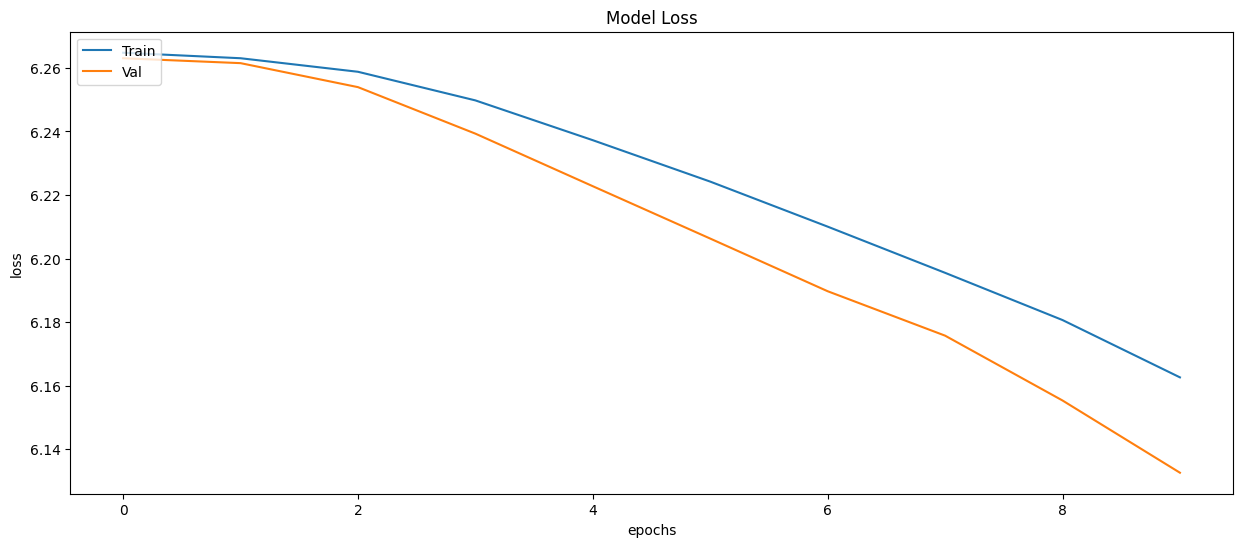

In [22]:
plt.figure(figsize=(15,6))
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model Loss')
plt.ylabel('loss')
plt.xlabel('epochs')
plt.legend(['Train','Val'], loc= 'upper left')
plt.show()

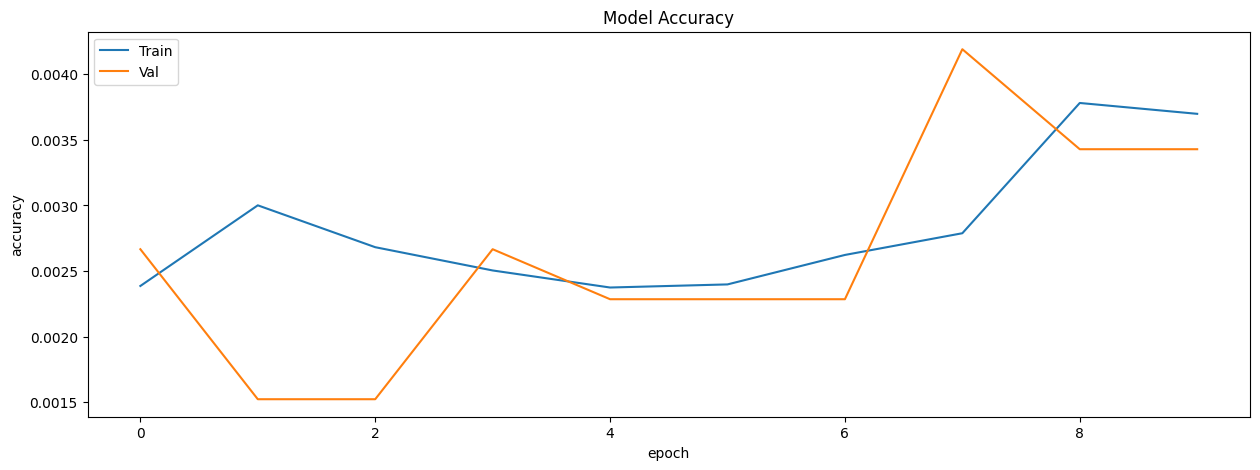

In [23]:
plt.figure(figsize=(15,5))
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model Accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['Train', 'Val'], loc='upper left')
plt.show()

In [24]:
y_test_1 = test_generator.classes
y_pred_1 =seq_model.predict(test_generator)
y_pred_1 = np.argmax(y_pred_1,axis=1)

83/83 [==============================] - 5s 62ms/step


In [25]:
results =seq_model.evaluate(test_generator)

83/83 [==============================] - 6s 68ms/step - loss: 6.1326 - accuracy: 0.0034


In [26]:
from sklearn.metrics import classification_report

print(classification_report(y_test_1, y_pred_1))

              precision    recall  f1-score   support

           0       0.00      0.00      0.00         5
           1       0.00      0.00      0.00         5
           2       0.00      0.00      0.00         5
           3       0.00      0.00      0.00         5
           4       0.00      0.00      0.00         5
           5       0.00      0.00      0.00         5
           6       0.00      0.00      0.00         5
           7       0.00      0.00      0.00         5
           8       0.00      0.00      0.00         5
           9       0.00      0.00      0.00         5
          10       0.00      0.00      0.00         5
          11       0.00      0.00      0.00         5
          12       0.00      0.00      0.00         5
          13       0.00      0.00      0.00         5
          14       0.00      0.00      0.00         5
          15       0.00      0.00      0.00         5
          16       0.00      0.00      0.00         5
          17       0.00    

/opt/conda/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/opt/conda/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/opt/conda/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


1/1 [==============================] - 0s 84ms/step


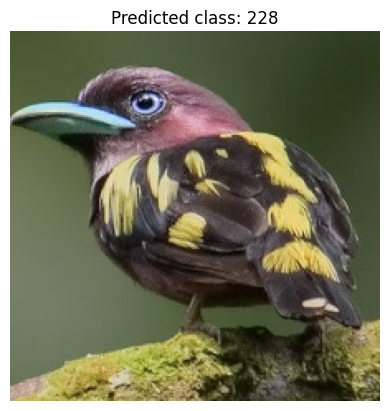

In [27]:
from PIL import Image
import os
import numpy as np
import matplotlib.pyplot as plt

image_directory = '/kaggle/input/100-bird-species/valid/BANDED BROADBILL'
img_size = 224

images = [] 
for filename in os.listdir(image_directory):
    path = os.path.join(image_directory, filename)
    img = Image.open(path)
    img = img.resize((img_size, img_size))
    images.append(img)

images = np.array([np.array(img) for img in images])
images = images / 255.0

predictions =seq_model.predict(images)

# Select image to display
img_index = 0

# Get predicted class label
class_label = np.argmax(predictions[img_index])

# Display image and predicted class label
plt.imshow(images[img_index])
plt.axis('off')
plt.title('Predicted class: ' + str(class_label))
plt.show()

In [28]:
for i in range(len(images)):
    predicted_class = np.argmax(predictions[i])
    class_probability = predictions[i, predicted_class]
    print(f'Predicted class for {i+1}.jpg : {labels[predicted_class]}')
    print('Class probability:', class_probability)

Predicted class for 1.jpg : FLAME BOWERBIRD
Class probability: 0.0030049153
Predicted class for 2.jpg : SURF SCOTER
Class probability: 0.0020193986
Predicted class for 3.jpg : FLAME BOWERBIRD
Class probability: 0.00678097
Predicted class for 4.jpg : SURF SCOTER
Class probability: 0.0020193986
Predicted class for 5.jpg : SURF SCOTER
Class probability: 0.0020193986


# Thank You !